## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

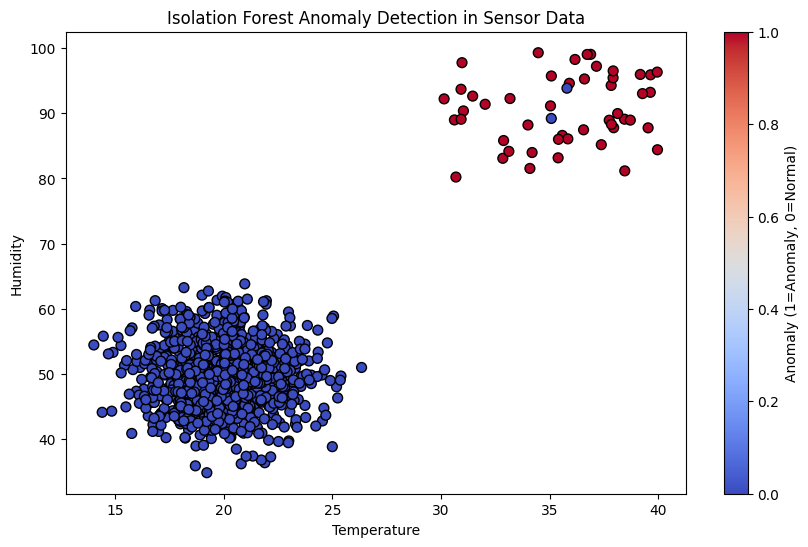

In [1]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Load Dataset
# For demo, create synthetic sensor data with normal and anomalous points

np.random.seed(0)

# Normal sensor readings: 1000 samples, 2 features (e.g., temperature and humidity)
normal_data = np.random.normal(loc=[20, 50], scale=[2, 5], size=(1000, 2))

# Anomalous sensor readings: 50 samples far from normal distribution
anomalies = np.random.uniform(low=[30, 80], high=[40, 100], size=(50, 2))

# Combine into one dataset
data = np.vstack((normal_data, anomalies))
df = pd.DataFrame(data, columns=['temperature', 'humidity'])

# Step 2: Feature Selection
# Use all features here (temperature, humidity)
X = df[['temperature', 'humidity']]

# Optional: scale features for better Isolation Forest performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Isolation Forest Implementation
iso_forest = IsolationForest(contamination=0.045, random_state=42)  # ~4.5% anomalies
df['anomaly'] = iso_forest.fit_predict(X_scaled)
# anomaly = -1 means anomaly, 1 means normal

# Step 4: Plot Results
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['humidity'], c=(df['anomaly'] == -1), cmap='coolwarm', edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection in Sensor Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Anomaly (1=Anomaly, 0=Normal)')
plt.show()
